# Case3 - 股價預測
## 目標:在本教程中，我們將嘗試使用前幾天收盤價、最高價、最低價等，股票價格中存在的向上和向下趨勢，即我們對預測所採取的方向更感興趣，而不是他們的價值與實際股票價格的接近程度。


In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense , Dropout

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings("ignore")

In [2]:
#指定資料路徑
data_path = "./data/"

In [3]:
#查看資料夾內的檔案
name = []
for i in os.listdir(data_path):
    name.append(i)
print(name)
print("檔案數量:",len(name))

['STOCK_DAY10501.csv', 'STOCK_DAY10502.csv', 'STOCK_DAY10503.csv', 'STOCK_DAY10504.csv', 'STOCK_DAY10505.csv', 'STOCK_DAY10506.csv', 'STOCK_DAY10507.csv', 'STOCK_DAY10508.csv', 'STOCK_DAY10509.csv', 'STOCK_DAY10510.csv', 'STOCK_DAY10511.csv', 'STOCK_DAY10512.csv', 'STOCK_DAY10601.csv', 'STOCK_DAY10602.csv', 'STOCK_DAY10603.csv', 'STOCK_DAY10604.csv', 'STOCK_DAY10605.csv', 'STOCK_DAY10606.csv', 'STOCK_DAY10607.csv', 'STOCK_DAY10608.csv', 'STOCK_DAY10609.csv', 'STOCK_DAY10610.csv', 'STOCK_DAY10611.csv', 'STOCK_DAY10612.csv', 'STOCK_DAY10701.csv', 'STOCK_DAY10702.csv', 'STOCK_DAY10703.csv', 'STOCK_DAY10704.csv', 'STOCK_DAY10705.csv', 'STOCK_DAY10706.csv', 'STOCK_DAY10707.csv', 'STOCK_DAY10708.csv', 'STOCK_DAY10709.csv', 'STOCK_DAY10710.csv', 'STOCK_DAY10711.csv', 'STOCK_DAY10712.csv', 'STOCK_DAY10801.csv', 'STOCK_DAY10802.csv', 'STOCK_DAY10803.csv', 'STOCK_DAY10804.csv']
檔案數量: 40


In [4]:
# ./data/STOCK_DAY10804.csv'

In [5]:
for i in name:
    data_temp = pd.read_csv(data_path+i, encoding = 'ANSI', thousands=",")
    print(data_temp.columns)

Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'], dtype='object')
Index(['日期

In [6]:
##  查看其中一個資料
pd.read_csv(data_path+'STOCK_DAY10512.csv', encoding = 'ANSI', thousands=",")

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,105/12/01,1955817,140730135,71.60,72.10,71.60,72.00,0.30,666
1,105/12/02,3307698,235128806,71.20,71.20,70.90,71.20,-0.80,736
2,105/12/05,1388169,98576875,71.20,71.20,70.80,71.10,-0.10,367
3,105/12/06,2435954,175403601,71.80,72.20,71.75,72.00,0.90,768
4,105/12/07,1467377,105807162,72.20,72.35,71.90,72.00,0.00,475
5,105/12/08,6085595,442984227,72.30,73.00,72.30,72.90,0.90,1529
6,105/12/09,5418281,395994807,73.05,73.20,72.95,73.15,0.25,1389
7,105/12/12,3208556,234598867,73.30,73.55,72.75,72.85,-0.30,1319
8,105/12/13,2548640,185727920,72.85,73.00,72.65,72.95,0.10,888
9,105/12/14,2827980,206668707,73.20,73.30,72.90,73.10,0.15,1333


In [7]:
##  查看其中一個資料
pd.read_csv(data_path+'STOCK_DAY10804.csv', encoding = 'ANSI', thousands=",")

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,Unnamed: 9
0,108/04/01,11053405,886568240,80.00,80.40,79.60,79.85,0.70,3749,NaN
1,108/04/02,5605092,449896022,80.10,80.45,80.10,80.15,0.30,2132,NaN
2,108/04/03,6867174,550702889,80.40,80.45,79.95,80.15,0.00,3017,NaN
3,108/04/08,7990782,646213579,80.80,81.00,80.70,80.90,0.75,3458,NaN
4,108/04/09,15272047,1239718747,80.95,81.40,80.85,81.40,0.50,6181,NaN
5,108/04/10,10863161,883369153,81.10,81.55,81.10,81.50,0.10,3214,NaN
6,108/04/11,8272430,671920398,81.35,81.55,80.90,81.15,-0.35,2220,NaN
7,108/04/12,7498409,608347094,81.15,81.30,81.00,81.10,-0.05,1806,NaN
8,108/04/15,7681554,628500222,81.65,82.00,81.55,81.85,0.75,4160,NaN
9,108/04/16,7767931,637026518,81.85,82.15,81.80,82.10,0.25,3439,NaN


# 將所有資料合併

In [8]:
data = pd.DataFrame()

In [9]:
for i in name:
    data_temp = pd.read_csv(data_path+i, encoding = 'ANSI', thousands=",")
    data = pd.concat([data , data_temp],axis = 0).reset_index(drop=True)

In [10]:
data

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,Unnamed: 9
0,105/01/04,16928063,1009176452,60.80,60.95,59.05,59.55,-1.2,5730,NaN
1,105/01/05,21783969,1291792220,59.50,59.75,58.85,59.05,-0.5,6708,NaN
2,105/01/06,28939550,1688039896,59.05,59.05,57.90,58.45,-0.6,8406,NaN
3,105/01/07,39962301,2289801488,58.30,58.30,56.70,57.35,-1.1,11325,NaN
4,105/01/08,25450734,1459152633,57.00,57.70,56.85,57.45,0.1,7024,NaN
...,...,...,...,...,...,...,...,...,...,...
805,108/04/24,3108556,258856445,83.40,83.55,82.90,83.20,0.15,1665,NaN
806,108/04/25,3529039,293890589,83.10,83.45,83.00,83.40,0.2,1588,NaN
807,108/04/26,3815090,314520959,82.80,82.80,82.20,82.45,-0.95,2520,NaN
808,108/04/29,3161957,261464012,82.60,82.95,82.50,82.80,0.35,1462,NaN


In [11]:
#drop掉多產生的欄位
data = data.drop(["Unnamed: 9"], axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      810 non-null    object 
 1   成交股數    810 non-null    int64  
 2   成交金額    810 non-null    int64  
 3   開盤價     810 non-null    float64
 4   最高價     810 non-null    float64
 5   最低價     810 non-null    float64
 6   收盤價     810 non-null    float64
 7   漲跌價差    810 non-null    object 
 8   成交筆數    810 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 57.1+ KB


In [13]:
#查看時間區間
data['日期'].unique()

array(['105/01/04', '105/01/05', '105/01/06', '105/01/07', '105/01/08',
       '105/01/11', '105/01/12', '105/01/13', '105/01/14', '105/01/15',
       '105/01/18', '105/01/19', '105/01/20', '105/01/21', '105/01/22',
       '105/01/25', '105/01/26', '105/01/27', '105/01/28', '105/01/29',
       '105/01/30', '105/02/01', '105/02/02', '105/02/03', '105/02/15',
       '105/02/16', '105/02/17', '105/02/18', '105/02/19', '105/02/22',
       '105/02/23', '105/02/24', '105/02/25', '105/03/01', '105/03/02',
       '105/03/03', '105/03/04', '105/03/07', '105/03/08', '105/03/09',
       '105/03/10', '105/03/11', '105/03/14', '105/03/15', '105/03/16',
       '105/03/17', '105/03/18', '105/03/21', '105/03/22', '105/03/23',
       '105/03/24', '105/03/25', '105/03/28', '105/03/29', '105/03/30',
       '105/03/31', '105/04/01', '105/04/06', '105/04/07', '105/04/08',
       '105/04/11', '105/04/12', '105/04/13', '105/04/14', '105/04/15',
       '105/04/18', '105/04/19', '105/04/20', '105/04/21', '105/

### 時間區間為105/01/04 - 108/04/30，共810筆

# 查看折線圖

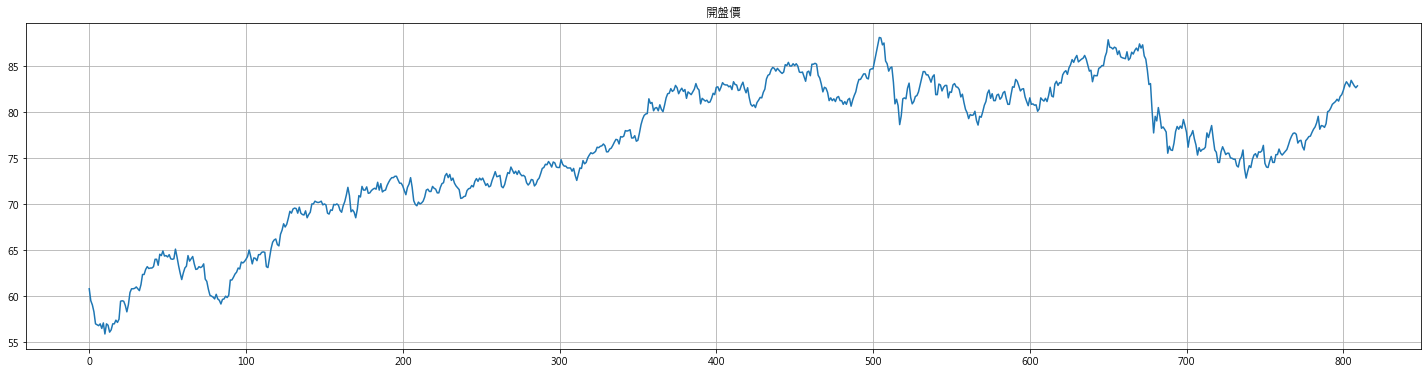

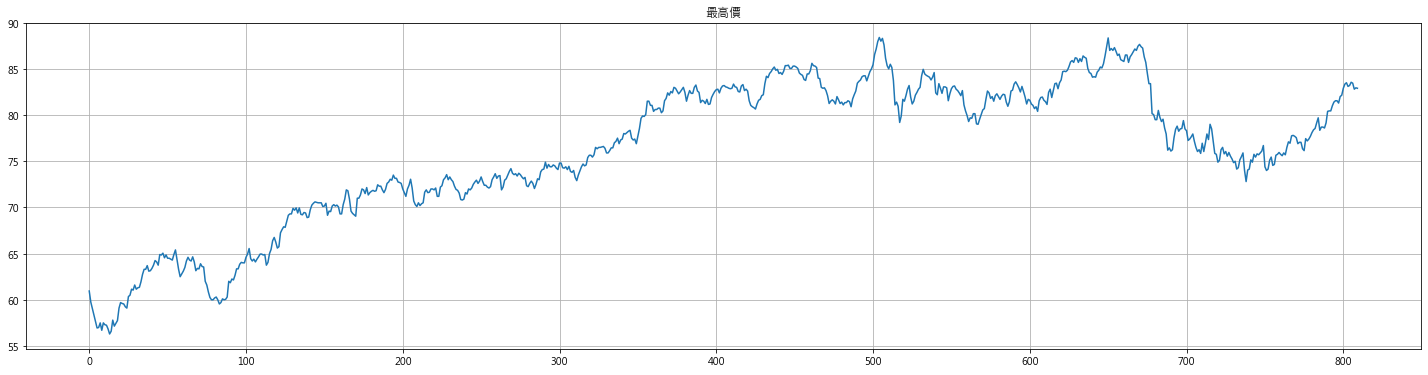

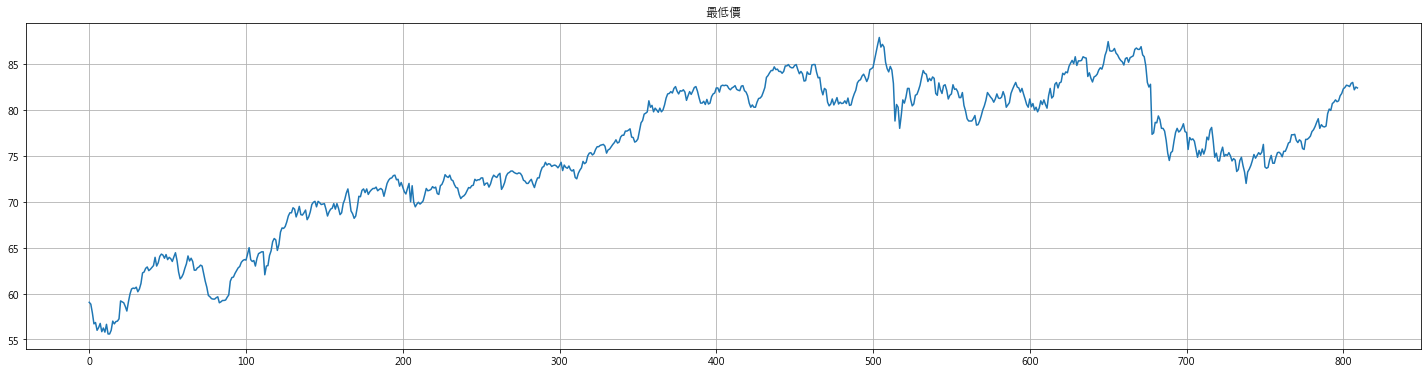

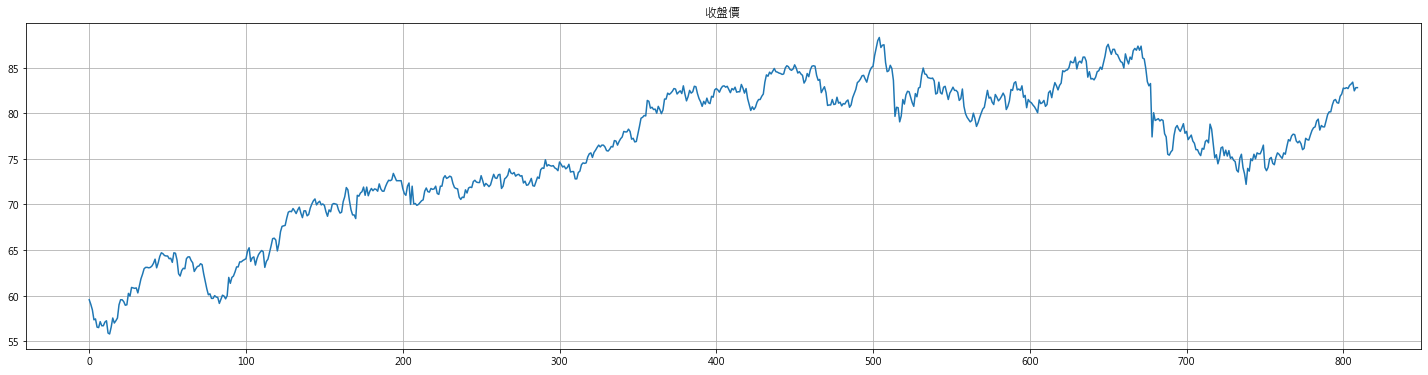

In [14]:
plt.figure(figsize=(25,6))
plt.plot(data['開盤價'])
plt.title("開盤價") 
plt.grid()
plt.show()
#------------------------------------------------
plt.figure(figsize=(25,6))
plt.plot(data['最高價'])
plt.title("最高價") 
plt.grid()
plt.show()
#------------------------------------------------
plt.figure(figsize=(25,6))
plt.plot(data['最低價'])
plt.title("最低價") 
plt.grid()
plt.show()
#------------------------------------------------
plt.figure(figsize=(25,6))
plt.plot(data['收盤價'])
plt.title("收盤價") 
plt.grid()
plt.show()

In [15]:
#drop掉不需要的欄位
data = data.drop(["日期","漲跌價差"], axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   成交股數    810 non-null    int64  
 1   成交金額    810 non-null    int64  
 2   開盤價     810 non-null    float64
 3   最高價     810 non-null    float64
 4   最低價     810 non-null    float64
 5   收盤價     810 non-null    float64
 6   成交筆數    810 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 44.4 KB


In [17]:
#查看shape
data.shape

(810, 7)

## 輸入用來預測的天數

In [18]:
# num_day = input("輸入要使用來預測的天數: ")
# num_day = int(num_day)
num_day = 10

# 做正規化 - Minmax

In [19]:
def normal(data):
# def自己定義一個函式來使用，函式名字叫normal
# 給進函式操作的東西叫data
    
    norm = data.copy()
    #先複製一個data
    
    mm = MinMaxScaler(feature_range=(-1, 1))
    # 宣告一個壓縮器    
    
    for i in data.columns:
        norm[i] = mm.fit_transform(list(data[i].values.reshape(-1, 1)))
    #用for迴圈依次序把每一欄特徵壓縮在1、-1之間     
    
    return norm
# return的data會是array

In [20]:
first  = [1,3,5,7,9]
second = [2,2,2,2,2]
col = {'first_' : first , 'second_' : second}
tt = pd.DataFrame(col)

In [21]:
tt

,first_,second_
0,1,2
1,3,2
2,5,2
3,7,2
4,9,2


In [22]:
#將值壓縮在同一區間內
#參考資料 https://ithelp.ithome.com.tw/articles/10240494
mm = MinMaxScaler(feature_range=(-1, 1))

In [23]:
list(tt['first_'].values.reshape(-1,1))

[array([1], dtype=int64),
 array([3], dtype=int64),
 array([5], dtype=int64),
 array([7], dtype=int64),
 array([9], dtype=int64)]

In [24]:
mm.fit_transform(tt['first_'].values.reshape(-1,1))

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]])

In [25]:
tt['first_'].values.reshape(-1,1)

array([[1],
       [3],
       [5],
       [7],
       [9]], dtype=int64)

# 轉置資料

In [26]:
def make_data(data , use_day=num_day):
    train_data=[]
    train_label=[]
    
    for i in range(data.shape[0]-use_day):
        temp_data = data.iloc[ i : i + use_day].values
        temp_label = data["收盤價"][i + use_day]
        train_data.append(temp_data)
        train_label.append(temp_label)
    
    train_data = np.array(train_data)
    train_label = np.array(train_label)
    
    return train_data , train_label

In [27]:
data.head(10)

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,成交筆數
0,16928063,1009176452,60.80,60.95,59.05,59.55,5730
1,21783969,1291792220,59.50,59.75,58.85,59.05,6708
2,28939550,1688039896,59.05,59.05,57.90,58.45,8406
3,39962301,2289801488,58.30,58.30,56.70,57.35,11325
4,25450734,1459152633,57.00,57.70,56.85,57.45,7024
5,24356269,1375352256,56.90,56.95,56.00,56.55,7405
6,17649886,998368462,56.80,57.00,56.30,56.50,5238
7,11848432,677682867,57.00,57.50,56.75,57.15,5664
8,15487360,871255829,56.50,56.70,55.85,56.70,5765
9,20847878,1181841700,57.10,57.50,56.25,56.70,4936


In [28]:
data_nor = normal(data)
data_nor.head()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,成交筆數
0,-0.524128,-0.646563,-0.695179,-0.710280,-0.786378,-0.769231,-0.629501
1,-0.380763,-0.540335,-0.776050,-0.785047,-0.798762,-0.800000,-0.562807
2,-0.169503,-0.391396,-0.804044,-0.828660,-0.857585,-0.836923,-0.447013
3,0.155932,-0.165210,-0.850700,-0.875389,-0.931889,-0.904615,-0.247954
4,-0.272506,-0.477429,-0.931571,-0.912773,-0.922601,-0.898462,-0.541258


In [29]:
data_nor.tail()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,成交筆數
805,-0.932134,-0.928588,0.710731,0.697819,0.690402,0.686154,-0.906710
806,-0.919720,-0.915420,0.692068,0.691589,0.696594,0.698462,-0.911961
807,-0.911275,-0.907666,0.673406,0.651090,0.647059,0.640000,-0.848404
808,-0.930558,-0.927608,0.660964,0.660436,0.665635,0.661538,-0.920554
809,-0.928020,-0.924974,0.673406,0.657321,0.659443,0.661538,-0.916258


In [30]:
train_data , train_label = make_data(data_nor)

In [31]:
train_data[-1]

array([[-0.79457125, -0.7864443 ,  0.61430793,  0.6105919 ,  0.62229102,
         0.61846154, -0.78573377],
       [-0.34176608, -0.30728296,  0.64230171,  0.65732087,  0.65325077,
         0.65846154, -0.65596017],
       [-0.41305069, -0.38068454,  0.67962675,  0.68535826,  0.6625387 ,
         0.65538462, -0.8030551 ],
       [-0.65439983, -0.63547863,  0.70139969,  0.69470405,  0.67801858,
         0.66153846, -0.86020185],
       [-0.93904993, -0.9363403 ,  0.68584759,  0.66978193,  0.6749226 ,
         0.65538462, -0.91946263],
       [-0.84641225, -0.8384758 ,  0.66718507,  0.67601246,  0.66873065,
         0.67692308, -0.87670486],
       [-0.93213414, -0.92858838,  0.71073095,  0.69781931,  0.69040248,
         0.68615385, -0.90671031],
       [-0.91971984, -0.91541997,  0.69206843,  0.69158879,  0.69659443,
         0.69846154, -0.91196127],
       [-0.9112745 , -0.90766556,  0.67340591,  0.65109034,  0.64705882,
         0.64      , -0.84840426],
       [-0.93055753, -0.9276

In [32]:
train_label[-1]

0.661538461538461

In [33]:

traindata , trainlabel = shuffle(train_data,train_label)
trainlabel = trainlabel[:, np.newaxis]
# 讓label 從array[0,1,2,3] 增加維度成 array[[0],[1],[2],[3]]
traindata.shape ,trainlabel.shape

((800, 10, 7), (800, 1))

In [34]:
traindata[5] , trainlabel[5]

(array([[-0.7605586 , -0.77821637,  0.12597201,  0.12149533,  0.10835913,
          0.09230769, -0.76193399],
        [-0.74002798, -0.75549788,  0.17573872,  0.17445483,  0.17027864,
          0.18461538, -0.64368522],
        [-0.88721888, -0.89499815,  0.19440124,  0.19626168,  0.19195046,
          0.21230769, -0.88331969],
        [-0.7720108 , -0.78678988,  0.24105754,  0.2211838 ,  0.13622291,
          0.12307692, -0.740521  ],
        [-0.62985107, -0.65708545,  0.11353033,  0.10280374,  0.09287926,
          0.08      , -0.6650982 ],
        [-0.39527435, -0.44700879,  0.05132193,  0.02803738,  0.01547988,
          0.00923077, -0.41837152],
        [-0.59269552, -0.62095002,  0.09797823,  0.105919  ,  0.09287926,
          0.11692308, -0.68671577],
        [-0.69895018, -0.7209152 ,  0.13530327,  0.11214953,  0.11145511,
          0.09846154, -0.82460447],
        [-0.68643727, -0.70441262,  0.12286159,  0.17445483,  0.13622291,
          0.18153846, -0.6603928 ],
        [-

In [35]:
traindata.shape

(800, 10, 7)

In [36]:
traindata.shape[1]

10

In [37]:
model = Sequential()
model.add(LSTM(units=100 , input_shape=(traindata.shape[1],7), return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(units=70 , activation="tanh" , return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50 , activation="tanh" , return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=25 , activation="tanh" , return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=10 , activation="tanh", return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1 , activation="tanh"))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           43200     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 70)            47880     
                                                                 
 dropout_1 (Dropout)         (None, 10, 70)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            24200     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 10, 25)            7

In [38]:
epochs = 100
validation_split=0.2
batch_size = 30

In [39]:
# epochs = input("模型訓練圈數:")
# epochs = int(epochs)
history = model.fit(traindata , trainlabel, epochs = epochs, batch_size =100,validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 9s 199ms/step - loss: 0.1946 - val_loss: 0.0921
Epoch 2/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0642 - val_loss: 0.0193
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0357 - val_loss: 0.0306
Epoch 4/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0280 - val_loss: 0.0137
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0219 - val_loss: 0.0135
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0208 - val_loss: 0.0132
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0193 - val_loss: 0.0123
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0184 - val_loss: 0.0110
Epoch 9/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0167 - val_loss: 0.0108
Epoch 10/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0166 - val_loss: 0.0116
Epoch 11/100
7/7 [

In [58]:
#model.save('LSTM_1_model.h5')

In [41]:
import matplotlib.pyplot as plt

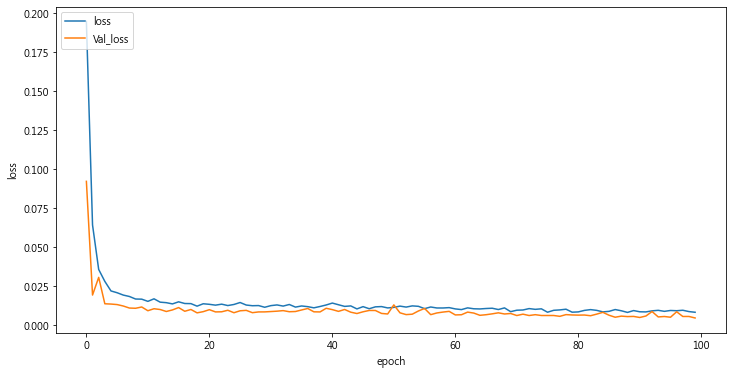

In [42]:
plt.figure(figsize=(12,6))
for i in history.history.keys():
    plt.plot(history.history[i])
    plt.ylabel('loss')
    plt.xlabel('epoch')
plt.legend(['loss','Val_loss'], loc='upper left')
plt.show()

# 讀取test資料

In [43]:
test_path = "./test/"
test_name = []
for i in os.listdir(test_path):
    test_name.append(i)
test_name

['STOCK_DAY10805.csv', 'STOCK_DAY10806.csv']

In [44]:
test_data= pd.DataFrame()
for i in test_name:
    datatemp = pd.read_csv(test_path + i, encoding = 'ANSI', thousands=",")
    test_data = pd.concat([test_data , datatemp],axis = 0  ).reset_index(drop=True)

In [45]:
test_num = test_data.shape[0]
test_data = test_data.drop(["日期","漲跌價差","Unnamed: 9"], axis=1)

In [46]:
answer = test_data["收盤價"]

In [47]:
train_test_data = pd.concat([data , test_data] , axis=0).reset_index(drop=True)

In [48]:
nor_train_test_data=normal(train_test_data)
pred_data = nor_train_test_data[-(test_num+num_day):].reset_index(drop=True)
test_data , test_label = make_data(pred_data)
test_data = np.array(test_data)
test_answer = model.predict(test_data)

2/2 [==============================] - 1s 9ms/step


In [49]:
test_data.shape

(40, 10, 7)

In [50]:
test_answer.shape

(40, 1)

In [51]:
data.tail()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,成交筆數
805,3108556,258856445,83.4,83.55,82.9,83.20,1665
806,3529039,293890589,83.1,83.45,83.0,83.40,1588
807,3815090,314520959,82.8,82.80,82.2,82.45,2520
808,3161957,261464012,82.6,82.95,82.5,82.80,1462
809,3247891,268471136,82.8,82.90,82.4,82.80,1525


In [52]:
train_test_data[-(test_num+num_day):].head()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,成交筆數
800,23104837,1911820959,82.30,82.90,82.30,82.75,5342
801,20690365,1716538233,82.90,83.35,82.45,82.70,3185
802,12515659,1038666179,83.25,83.50,82.70,82.80,2347
803,2874312,238232670,83.00,83.10,82.65,82.70,1478
804,6012031,498598254,82.70,83.20,82.55,83.05,2105


In [53]:
test_data.shape

(40, 10, 7)

In [54]:
data.head()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,成交筆數
0,16928063,1009176452,60.80,60.95,59.05,59.55,5730
1,21783969,1291792220,59.50,59.75,58.85,59.05,6708
2,28939550,1688039896,59.05,59.05,57.90,58.45,8406
3,39962301,2289801488,58.30,58.30,56.70,57.35,11325
4,25450734,1459152633,57.00,57.70,56.85,57.45,7024


In [55]:
from sklearn import preprocessing
scaler= preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler.fit(list(data["收盤價"].values.reshape(-1, 1)))

MinMaxScaler(feature_range=(-1, 1))

In [56]:
real_pred_answer= scaler.inverse_transform(test_answer)

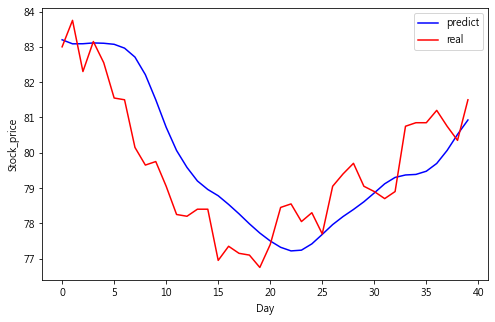

In [57]:
plt.figure(figsize=(8,5))
plt.plot(real_pred_answer,color='blue', label='predict')
plt.plot(answer,color='red', label='real')
plt.ylabel('Stock_price')
plt.xlabel('Day')
plt.legend(loc='best')
plt.show()